# WeatherPy
----
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
#Questions:
# Only some of my linear regressions are showing the equation??
# Some plots have lots of space after them after adding the linear regression? Not sure why, doesn't really matter


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#For loop to iterate through - but test it on one first (0 index) to make sure it works
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

response=[]
city_id=[]
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
long=[]
temp_max=[]
wind_speed=[]
#city_number=1

for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        response = requests.get(query_url).json()
        city_id.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        #city_number=city_number+1
        print(f'city number: {city}')
    except:
        print("Not available")

response

city number: torbay
city number: ambilobe
city number: bengkulu
city number: kaitangata
city number: rikitea
city number: carnarvon
city number: kodiak
city number: yar-sale
city number: kapaa
city number: barrow
city number: cape town
city number: fortuna
city number: wangkui
city number: port alfred
city number: hilo
city number: edson
city number: kalga
city number: punta arenas
city number: ruzhyn
city number: lamu
Not available
Not available
city number: fairbanks
city number: ushuaia
city number: mataura
city number: clyde river
city number: cayenne
city number: hermanus
city number: samarai
Not available
city number: portland
city number: maldonado
city number: kirovskiy
city number: tiksi
city number: hashtrud
city number: port hardy
city number: tlanchinol
city number: qaanaaq
city number: busselton
Not available
city number: tuatapere
city number: katsuura
city number: victoria
city number: vaini
city number: zvishavane
city number: bluff
Not available
city number: esperance


city number: aswan
city number: hailey
city number: ikot ekpene
city number: moerai
city number: poum
city number: kudahuvadhoo
city number: blagoyevo
city number: biak
city number: lang son
city number: dingle
city number: dwarka
city number: kaz
Not available
city number: harper
city number: nome
city number: roald
city number: seoul
city number: blairmore
city number: axim
city number: mount isa
city number: bundaberg
city number: maceio
Not available
city number: harrisonburg
city number: carutapera
city number: namatanai
Not available
city number: bubaque
city number: port-gentil
city number: kayasula
city number: fethiye
city number: dzerzhinsk
city number: lorengau
city number: praia da vitoria
city number: algiers
Not available
city number: banihal
city number: comodoro rivadavia
city number: trojan
city number: miri
city number: san cristobal
city number: sitka
city number: codrington
city number: xining
city number: arizona
city number: komsomolskiy
city number: kovdor
city n

{'coord': {'lon': -43.46, 'lat': -2.6},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 297.66,
  'feels_like': 299.7,
  'temp_min': 297.66,
  'temp_max': 297.66,
  'pressure': 1012,
  'humidity': 79,
  'sea_level': 1012,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 2.79, 'deg': 67},
 'clouds': {'all': 42},
 'dt': 1595203196,
 'sys': {'country': 'BR', 'sunrise': 1595149221, 'sunset': 1595192375},
 'timezone': -10800,
 'id': 3398428,
 'name': 'Humberto de Campos',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
weather_dict = ({
    "City ID": city_id,
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": temp_max,
    "Wind Speed": wind_speed})

weather_data=pd.DataFrame(weather_dict)
weather_data.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,6167817,Torbay,20,CA,1595203233,60,47.67,-52.73,293.15,6.20
1,1082243,Ambilobe,15,MG,1595203193,71,-13.20,49.05,291.70,2.36
2,1649150,Bengkulu,40,ID,1595203233,90,-3.80,102.27,297.46,2.17
3,2208248,Kaitangata,98,NZ,1595203115,76,-46.28,169.85,278.71,0.89
4,4030556,Rikitea,45,PF,1595202890,62,-23.12,-134.97,293.53,4.93


In [24]:
weather_data.to_csv(r'output_data_file', index=False)
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Get the indices of cities that have humidity over 100%.

humidity_over_100 = weather_data.loc[weather_data["Humidity"]>100]
humidity_over_100

,City ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed


In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

humidity_under_100 = weather_data.loc[weather_data["Humidity"]<100]
humidity_under_100
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,6167817,Torbay,20,CA,1595203233,60,47.67,-52.73,293.15,6.20
1,1082243,Ambilobe,15,MG,1595203193,71,-13.20,49.05,291.70,2.36
2,1649150,Bengkulu,40,ID,1595203233,90,-3.80,102.27,297.46,2.17
3,2208248,Kaitangata,98,NZ,1595203115,76,-46.28,169.85,278.71,0.89
4,4030556,Rikitea,45,PF,1595202890,62,-23.12,-134.97,293.53,4.93
...,...,...,...,...,...,...,...,...,...,...
557,2270385,Camacha,40,PT,1595203301,83,33.08,-16.33,294.15,4.10
558,1257551,Samāstipur,100,IN,1595203301,93,25.85,85.78,299.60,3.60
559,3452440,Prata,0,BR,1595203301,51,-19.31,-48.92,292.11,3.26
561,156312,Kwakoa,11,TZ,1595203301,83,-3.77,37.72,289.74,1.72


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

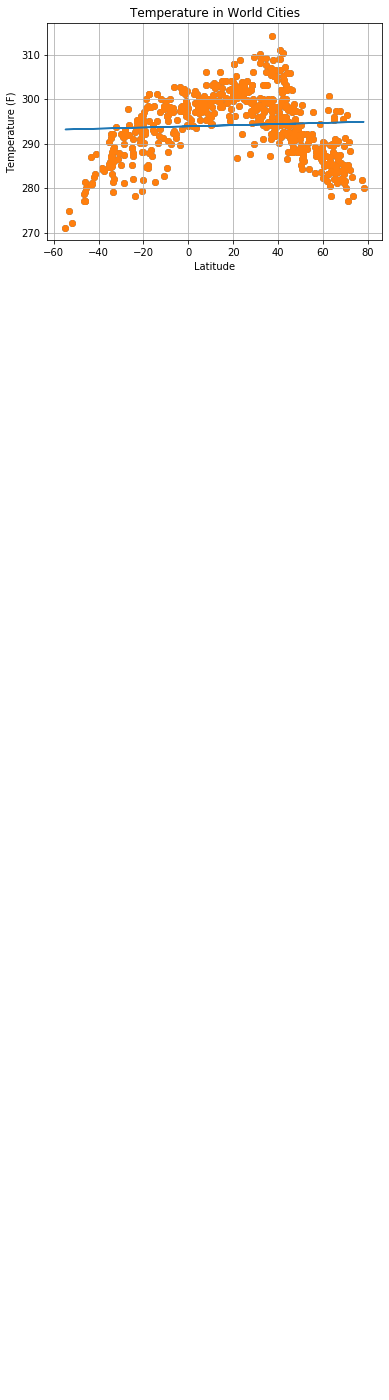

This code makes a scatterplot and linear regression for Latitude and Max Temp variables. The plot shows that temperature is hotter near the equator.


In [88]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = weather_data["Latitude"]
y_values = weather_data["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

print(f'This code makes a scatterplot and linear regression for Latitude and Max Temp variables. The plot shows that temperature is hotter near the equator.')

## Latitude vs. Humidity Plot

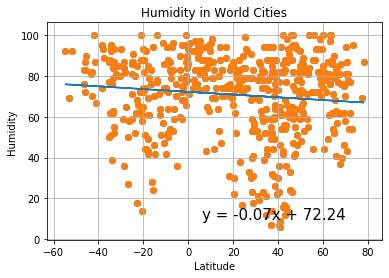

This code makes a scatterplot and linear regression for Latitude and Humidity variables. The plot shows a slight negative correlation between the two variables.


In [87]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

x_values = weather_data["Latitude"]
y_values = weather_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()
print(f'This code makes a scatterplot and linear regression for Latitude and Humidity variables. The plot shows a slight negative correlation between the two variables.')

## Latitude vs. Cloudiness Plot

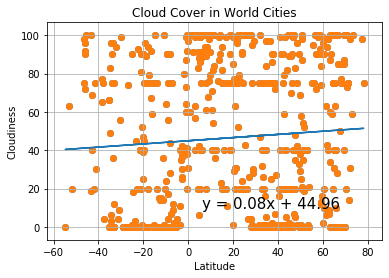

This code makes a scatterplot for Latitude and Cloudiness variables. The plot shows a slight positive correlation between the two variables.


In [90]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloud Cover in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

x_values = weather_data["Latitude"]
y_values = weather_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

print(f'This code makes a scatterplot for Latitude and Cloudiness variables. The plot shows a slight positive correlation between the two variables.')

## Latitude vs. Wind Speed Plot

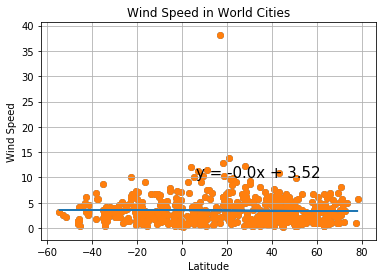

This code makes a scatterplot for Latitude and Wind Speed variables. The plot indicates that latitude does not affect wind speed.


In [89]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

x_values = weather_data["Latitude"]
y_values = weather_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

print(f'This code makes a scatterplot for Latitude and Wind Speed variables. The plot indicates that latitude does not affect wind speed.')

## Linear Regression

In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Latitude"]>0]
northern_hemisphere

,City ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,6167817,Torbay,20,CA,1595203233,60,47.67,-52.73,293.15,6.20
6,5866583,Saint Paul Harbor,90,US,1595203090,82,57.79,-152.41,288.15,5.10
7,1486321,Yar-Sale,0,RU,1595203233,77,66.83,70.83,283.66,3.94
8,5848280,Kapaa,75,US,1595203173,74,22.08,-159.32,302.59,7.20
9,5880054,Barrow,75,US,1595202964,78,71.29,-156.79,277.15,5.70
...,...,...,...,...,...,...,...,...,...,...
554,1610538,Kabin Buri,100,TH,1595203245,88,13.95,101.72,299.65,0.60
555,5710360,Winnemucca,1,US,1595203300,6,40.97,-117.74,311.15,6.20
557,2270385,Camacha,40,PT,1595203301,83,33.08,-16.33,294.15,4.10
558,1257551,Samāstipur,100,IN,1595203301,93,25.85,85.78,299.60,3.60


In [35]:
southern_hemisphere = weather_data.loc[weather_data["Latitude"]<0]
southern_hemisphere

,City ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
1,1082243,Ambilobe,15,MG,1595203193,71,-13.20,49.05,291.70,2.36
2,1649150,Bengkulu,40,ID,1595203233,90,-3.80,102.27,297.46,2.17
3,2208248,Kaitangata,98,NZ,1595203115,76,-46.28,169.85,278.71,0.89
4,4030556,Rikitea,45,PF,1595202890,62,-23.12,-134.97,293.53,4.93
5,2074865,Carnarvon,0,AU,1595203212,87,-24.87,113.63,282.15,4.10
...,...,...,...,...,...,...,...,...,...,...
549,1640660,Gondanglegi,0,ID,1595203300,82,-7.75,112.01,297.82,5.17
556,3401845,Conceição do Araguaia,28,BR,1595203300,54,-8.26,-49.26,300.15,1.50
559,3452440,Prata,0,BR,1595203301,51,-19.31,-48.92,292.11,3.26
561,156312,Kwakoa,11,TZ,1595203301,83,-3.77,37.72,289.74,1.72


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

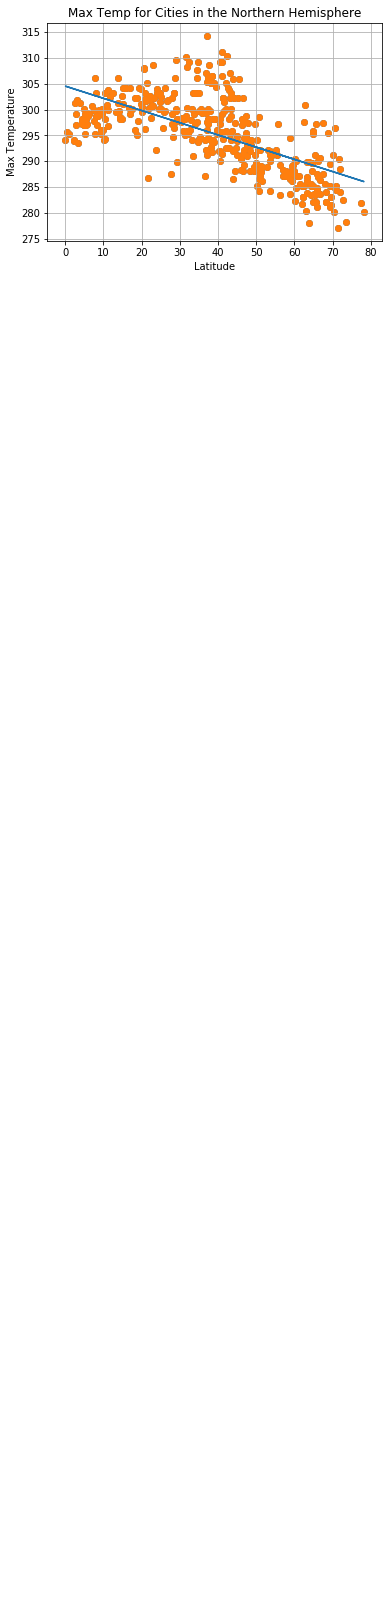

This linear regression models the relationship between Latitude and Max Temp for cities in the Northern Hemisphere. There is a strong negative correlation between the two variables.


In [91]:
# Build a scatter plot for each data type
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temp for Cities in the Northern Hemisphere")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("MaxTempInNorthernHemCities.png")

# Show plot
plt.show()
#Explain what the linear regression is modeling (relationships and any other analysis).
print('This linear regression models the relationship between Latitude and Max Temp for cities in the Northern Hemisphere. There is a strong negative correlation between the two variables.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

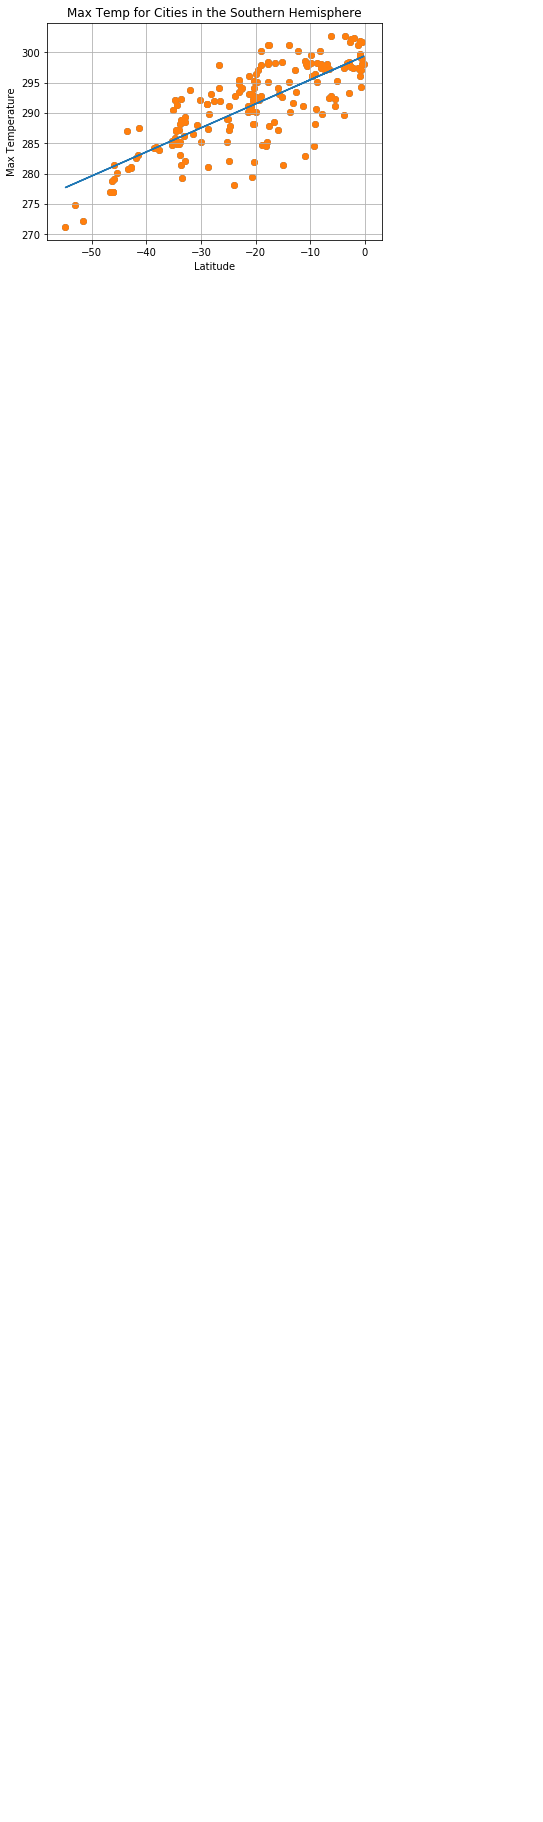

Explain what the linear regression is modeling (relationships and any other analysis).


In [78]:
# Build a scatter plot for each data type
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temp for Cities in the Southern Hemisphere")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("MaxTempInSouthernHemCities.png")

# Show plot
plt.show()

print('This linear regression models the relationship between Latitude and Max Temp for cities in the Northern Hemisphere. There is a strong negative correlation between the two variables.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

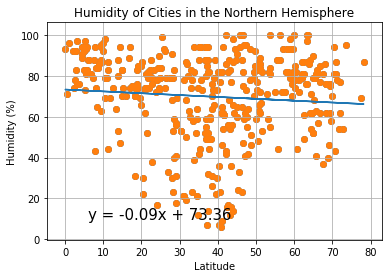

Explain what the linear regression is modeling (relationships and any other analysis).


In [79]:
# Build a scatter plot for each data type
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity of Cities in the Northern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("HumidityInNorthernHemCities.png")

# Show plot
plt.show()
print('Explain what the linear regression is modeling (relationships and any other analysis).')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

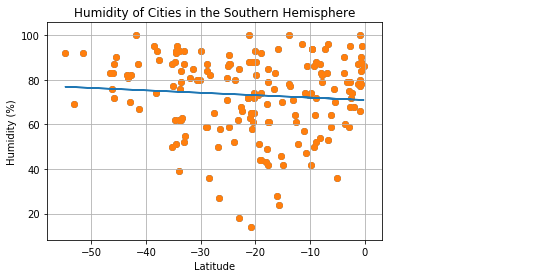

Explain what the linear regression is modeling (relationships and any other analysis).


In [80]:
# Build a scatter plot for each data type
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity of Cities in the Southern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("HumidityInSouthernHemCities.png")

# Show plot
plt.show()

print('Explain what the linear regression is modeling (relationships and any other analysis).')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

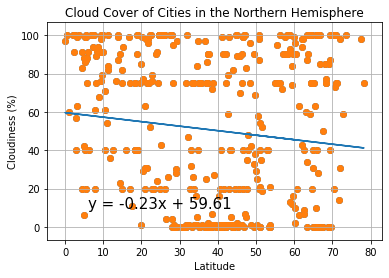

Explain what the linear regression is modeling (relationships and any other analysis).


In [81]:
# Build a scatter plot for each data type
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloud Cover of Cities in the Northern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("CloudinessInNorthernHemCities.png")

# Show plot
plt.show()

print('Explain what the linear regression is modeling (relationships and any other analysis).')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

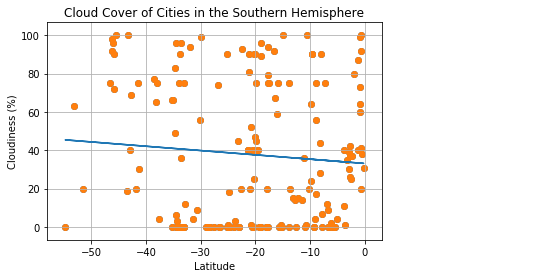

Explain what the linear regression is modeling (relationships and any other analysis).


In [82]:
# Build a scatter plot for each data type
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloud Cover of Cities in the Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("CloudinessInSouthernHemCities.png")

# Show plot
plt.show()

print('Explain what the linear regression is modeling (relationships and any other analysis).')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

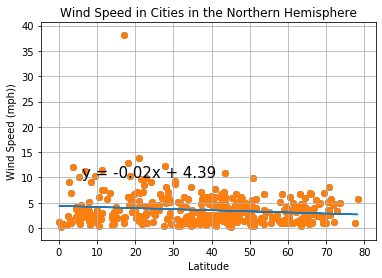

Explain what the linear regression is modeling (relationships and any other analysis).


In [83]:
# Build a scatter plot for each data type
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in Cities in the Northern Hemisphere")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("WindSpeedInNorthernHemCities.png")

# Show plot
plt.show()

print('Explain what the linear regression is modeling (relationships and any other analysis).')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

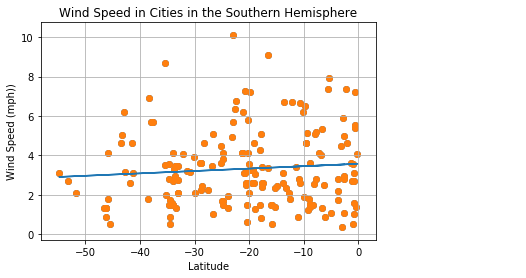

Explain what the linear regression is modeling (relationships and any other analysis).


In [84]:
# Build a scatter plot for each data type
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in Cities in the Southern Hemisphere")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("WindSpeedInSouthernHemCities.png")

# Show plot
plt.show()

print('Explain what the linear regression is modeling (relationships and any other analysis).')